<a href="https://colab.research.google.com/github/jimenabarrerau/Actividad6/blob/main/Actividad6_JimenaUribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('cuentas_credicel.csv', encoding = 'latin')
df.sample(10)

<ipython-input-2-e883e98029ae>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('cuentas_credicel.csv', encoding = 'latin')


folio       tag  folio_solicitud           fecha     marca  \
21259  21464  WH3M75NU            89824  30/03/23 20:07   Samsung   
1395    1403  0OZ8P0I6             7279  23/04/22 15:17   Samsung   
16751  16924  EV0784S3            63101  30/01/23 17:47   Samsung   
10504  10656  KQ15STT3            43321  14/11/22 19:48   Samsung   
5373    5508  GC6220UB            20840  16/07/22 10:47   Samsung   
19259  19433  HH5ANJ1F            80303  04/03/23 15:07  MOTOROLA   
19536  19710  7Y8KEFSF            81485  07/03/23 16:34     NOKIA   
13602  13755  9RBG0K5I            56828  24/12/22 15:06   Samsung   
9767    9916  9KFCOBZF            39981  01/11/22 15:05   Hisense   
12328  12481  ZD97H460            52235  11/12/22 16:23  MOTOROLA   

                           modelo plazo   precio  enganche  descuento  ...  \
21259                         A23   39S  7899.00    1670.0        0.0  ...   
1395                          A03   13S  2900.00     725.0        0.0  ...   
16751                        A03s   26S  4759.00    1664.0        0.0  ...   
10504                    A03 Core   13S  3699.00    1256.0        0.0  ...   
5373                          A13   39S  5249.00     787.0        0.0  ...   
19259  4G XT2239-17 E22I Gris Kit   26S  3508.83     799.0        0.0  ...   
19536          C30 2+64 GB GRIS B   26S  3274.83     858.0        0.0  ...   
13602                         A03   39S  5099.00     913.0      200.0  ...   
9767                         V40s   26S  3239.00     924.0        0.0  ...   
12328  4G XT2239-17 E22I Gris Kit   26S  3508.83     332.0        0.0  ...   

       porc_eng  limite_credito  semana_actual  cp_cliente edad_cliente  \
21259     21.14            6500              3       78040         46.0   
1395      25.00            7000             13         NaN         36.0   
16751     34.97            3500             11       39412         51.0   
10504     33.96            3500             13       72493         38.0   
5373      14.99           10000             39         NaN         19.0   
19259     22.77            5000              6       90110         45.0   
19536     26.20            4000              6       90821         50.0   
13602     17.91            6500             16       78230         30.0   
9767      28.53            4000             26       60950         56.0   
12328      9.46           10000             18       92101         37.0   

                 cd_cliente  edo_cliente                    cd_venta  \
21259       SAN LUIS POTOSI          SLP             San Luis Potosi   
1395   FLORENCIO VILLARREAL         GRO.                 Cruz Grande   
16751    ACAPULCO DE JUAREZ          GRO           San Jose Del Cabo   
10504                PUEBLA          PUE  Heroica Puebla De Zaragoza   
5373                 TENABO        CAMP.                      Tenabo   
19259              TLAXCALA         TLAX    Tlaxcala de Xicohtencatl   
19536           CHIAUTEMPAN         TLAX    Tlaxcala de Xicohtencatl   
13602       SAN LUIS POTOSI          SLP             San Luis Potosi   
9767              MICHOACAN         MICH                 Zihuatanejo   
12328             TANTOYUCA          VER                   Tantoyuca   

                 edo_venta                curp  
21259      San Luis Potosi  SUVR760916HSPRLG03  
1395              Guerrero  SEPL850707MGRRCS01  
16751  Baja California Sur  OAHM710408MGRLRR04  
10504               Puebla  HEJB840716HPLRMR14  
5373              Campeche  PECD030602MCCCHLA1  
19259               Puebla  RALE771002MDFMPR06  
19536               Puebla  PAPA720612HTLLLN08  
13602      San Luis Potosi  PETC921216MSPDRR08  
9767              Guerrero  SODA660619MMNTLL01  
12328             Veracruz  HEAV850617MVZRNC06  

[10 rows x 39 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [4]:
nulos= df.isnull().sum()

In [5]:
#Identifico las columnas que tienen valores nulos
columnas = nulos[nulos > 0].index.tolist()
columnas
"""
La imputación de datos para el df por medio de métodos como bfill o ffill, generaría valores incorrectos,
porque cada registro es único e independiente de observaciones posteriores o anteriores. Las variables numéricas con nulos
son categóricas ej. CP, e imputación por medio de mediana o media daría lugar a CP inexistentes
"""

'\nLa imputación de datos para el df por medio de métodos como bfill o ffill, generaría valores incorrectos, \nporque cada registro es único e independiente de observaciones posteriores o anteriores. Las variables numéricas con nulos\nson categóricas ej. CP, e imputación por medio de mediana o media daría lugar a CP inexistentes\n'

In [6]:
"""Límite crédito es una variable numérica stored as object
Tiene valores str (SD)
Identificar str y reemplazarlos con la mediana del limite_credito
Reemplazar el dtype object -> int
"""

df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')
mediana = df['limite_credito'].median()
df['limite_credito'].fillna(mediana, inplace=True)
df['limite_credito'] = df['limite_credito'].astype(int)
df['limite_credito']

0         5000
1         6000
2            0
3         7000
4         7000
         ...  
22730    10000
22731     5000
22732     4750
22733     7000
22734     4750
Name: limite_credito, Length: 22735, dtype: int64

In [7]:
#Para rellenar nulos empleo leyenda "dato no disponible"
df.fillna("Dato no disponible", inplace=True)

In [8]:
nulos= df.isnull().sum()
nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [9]:
#Tratamiento de outliers
for i in df.columns:
  if i != 'folio' and i != 'folio_solicitud':
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
      q1 = df[i].quantile(0.25)
      q3 = df[i].quantile(0.75)
      iqr = q3 - q1
      li = q1 - 1.5 * iqr
      ls = q3 + 1.5 * iqr
      df = df[(df[i] >= li) & (df[i] <= ls)]

# **Modelos de correlación**



In [25]:
def cuad(x, a, b, c):
    return (a * x**2) + (b * x) + c

def tangencial(x, a, b):
  return a * np.tan(x) + b

def sinoidal(x, a, b):
    return a * np.sin(x) + b

def coeficientes(x, a, b, c):
  return (a * x + b) * x + c * x


Objetivo: riesgo, Independiente: precio
Function: cuad
Parameters (a, b, c): -9.456448355022178e-07, 0.007551804835596777, -7.655063754369278
R-squared: 0.00460970554772977




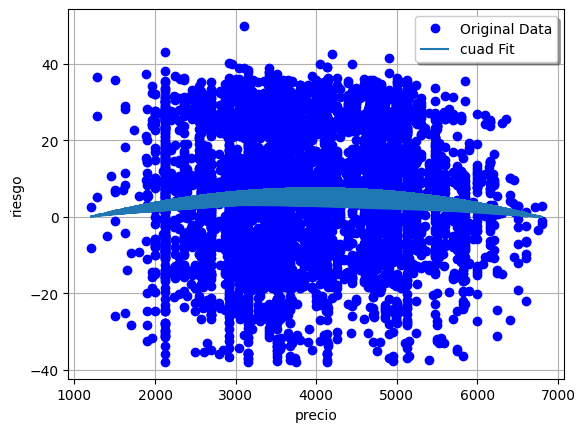

Objetivo: riesgo, Independiente: precio
Function: tangencial
Parameters (a, b, c): -0.08667614362491904, 6.434924054054511, -7.655063754369278
R-squared: 0.0007418407340101796




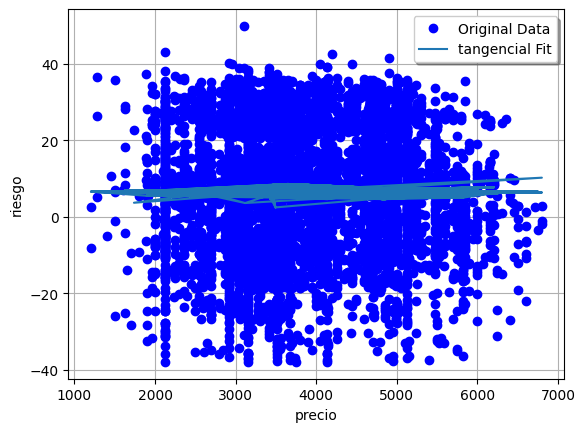

Objetivo: riesgo, Independiente: precio
Function: sinoidal
Parameters (a, b, c): -0.22869696010122742, 6.4630834734269245, -7.655063754369278
R-squared: 8.869163236135957e-05




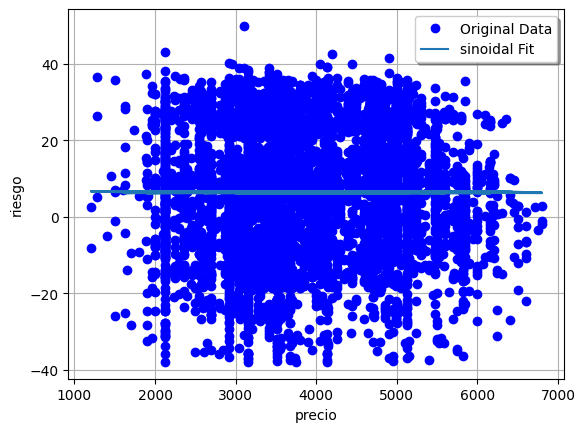

Objetivo: riesgo, Independiente: precio
Function: coeficientes
Parameters (a, b, c): -4.806353953326698e-07, -49.935035066404296, 49.93869597508703
R-squared: 0.0033821570775228738




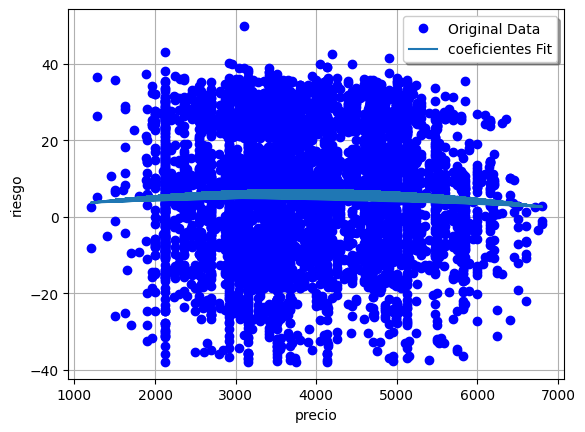

Objetivo: riesgo, Independiente: enganche
Function: cuad
Parameters (a, b, c): -1.9255710219118072e-05, 0.05918075807474613, -29.148688108072932
R-squared: 0.15678201563732996




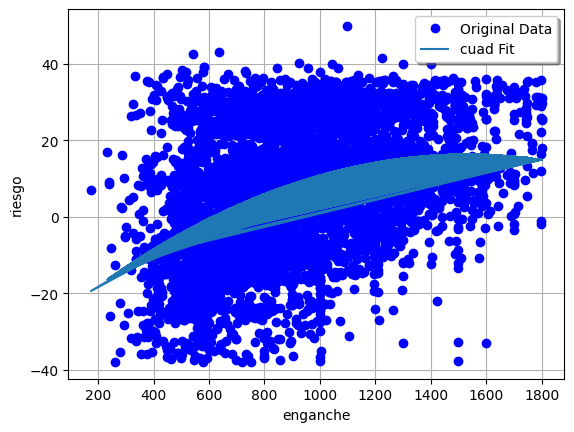

Objetivo: riesgo, Independiente: enganche
Function: tangencial
Parameters (a, b, c): 0.008558142115281124, 6.457157043226835, -29.148688108072932
R-squared: 7.024968946856003e-05




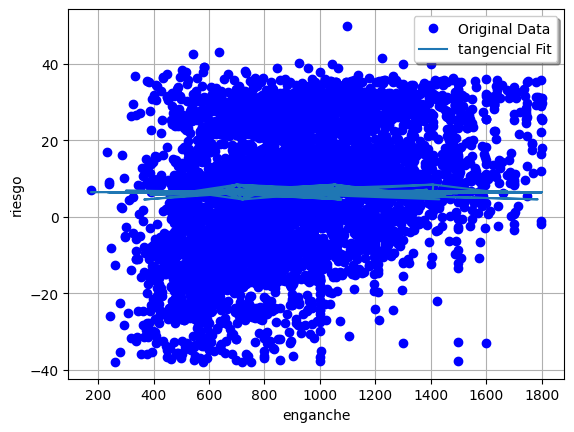

Objetivo: riesgo, Independiente: enganche
Function: sinoidal
Parameters (a, b, c): -0.2224794405570507, 6.461142513811861, -29.148688108072932
R-squared: 8.96768935059189e-05




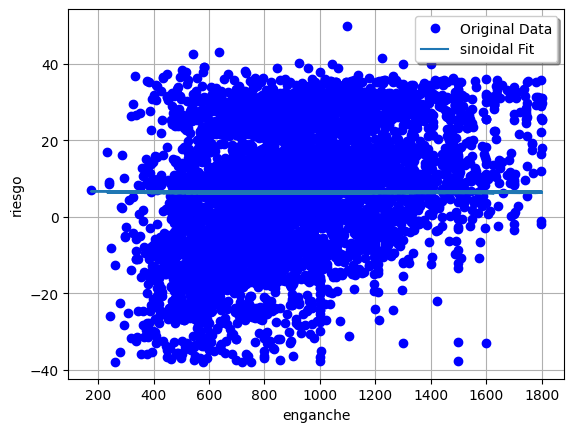

Objetivo: riesgo, Independiente: enganche
Function: coeficientes
Parameters (a, b, c): 1.0102154799906948e-05, -78962.13009345786, 78962.12797829654
R-squared: 0.11576487055865825




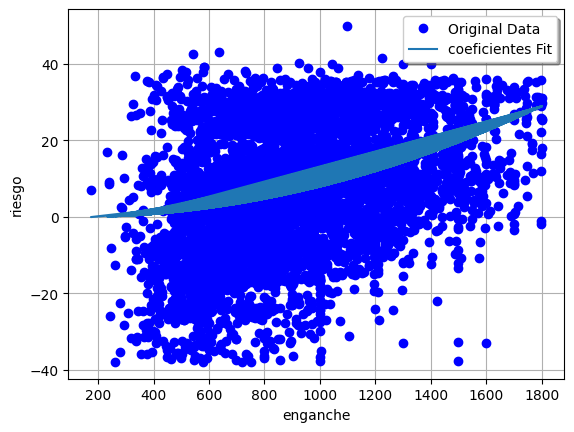

Objetivo: riesgo, Independiente: pagos_realizados
Function: cuad
Parameters (a, b, c): -0.016455799924003235, 0.19277323180103983, 6.816109262552772
R-squared: 0.008203117611316202




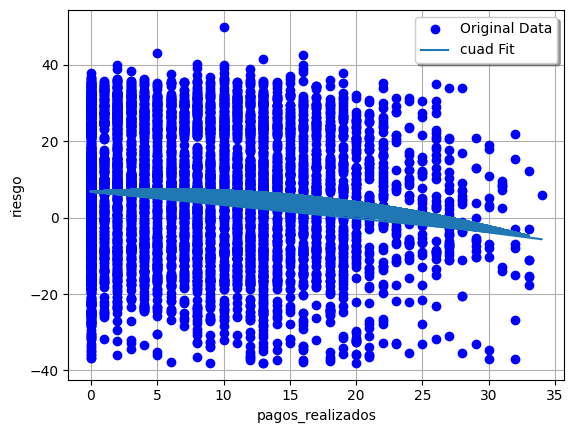

Objetivo: riesgo, Independiente: pagos_realizados
Function: tangencial
Parameters (a, b, c): -0.0028819890964969066, 6.432729806994758, 6.816109262552772
R-squared: 5.9372360504794663e-05




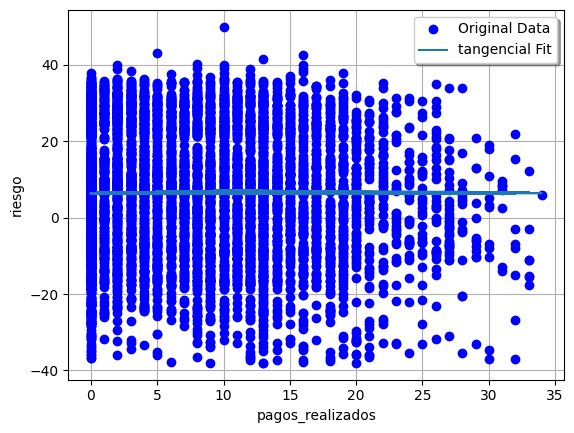

Objetivo: riesgo, Independiente: pagos_realizados
Function: sinoidal
Parameters (a, b, c): 0.5248497612864729, 6.42529279023836, 6.816109262552772
R-squared: 0.0003989541383484507




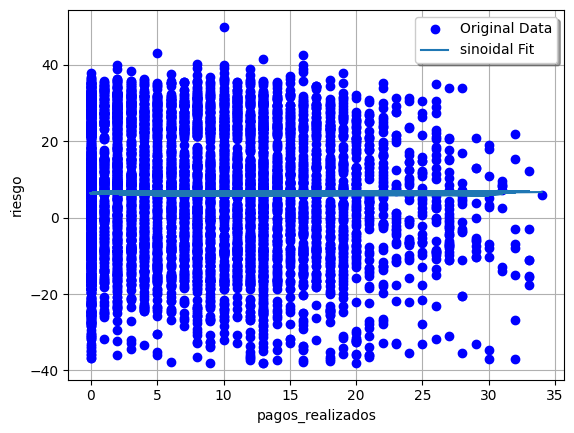

Objetivo: riesgo, Independiente: pagos_realizados
Function: coeficientes
Parameters (a, b, c): -0.05001288204715593, -1317.3262288272651, 1318.5780109587408
R-squared: -0.04111523888209567




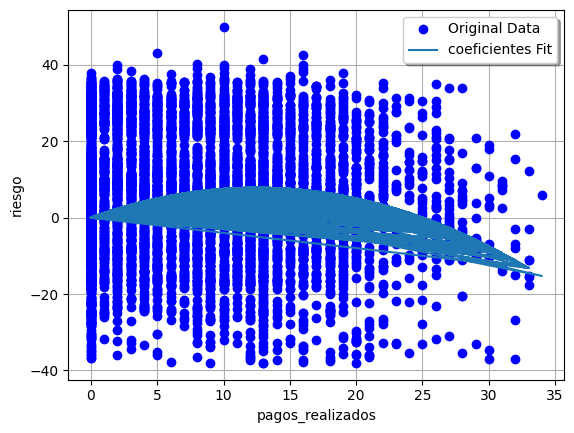

Objetivo: riesgo, Independiente: costo_total
Function: cuad
Parameters (a, b, c): -2.4189309739070286e-07, 0.0014682940315367357, 6.242330364031067
R-squared: 0.02236403634673445




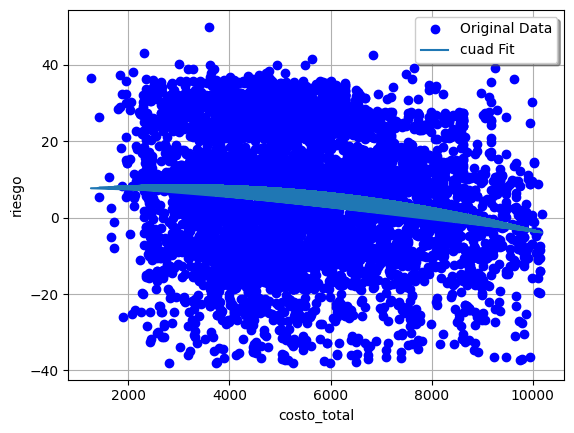

Objetivo: riesgo, Independiente: costo_total
Function: tangencial
Parameters (a, b, c): -0.024905012221033956, 6.461062452379836, 6.242330364031067
R-squared: 0.0007579962786281591




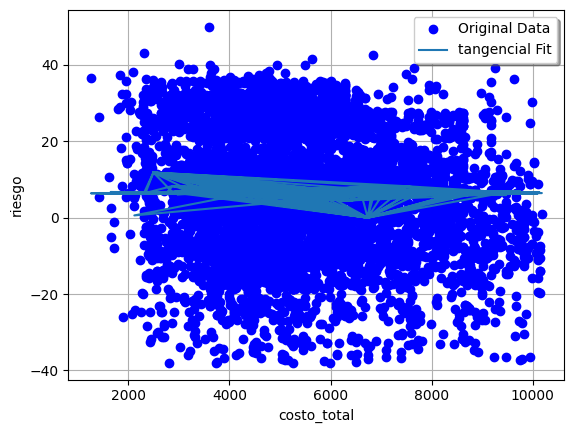

Objetivo: riesgo, Independiente: costo_total
Function: sinoidal
Parameters (a, b, c): 0.17110607286545337, 6.456360495776754, 6.242330364031067
R-squared: 5.1845987952270356e-05




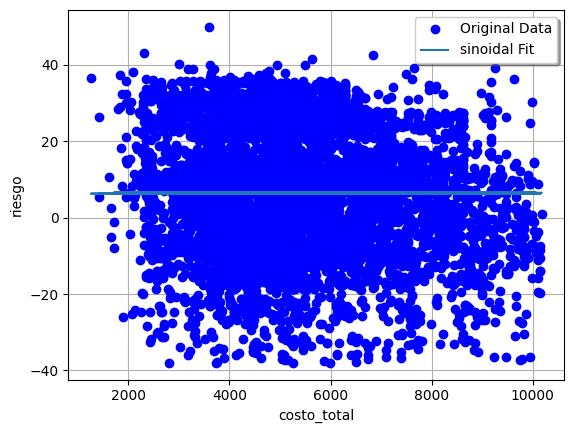

Objetivo: riesgo, Independiente: costo_total
Function: coeficientes
Parameters (a, b, c): -4.19035198984119e-07, -473746.1546596, 473746.15832829446
R-squared: 0.020632370023020208




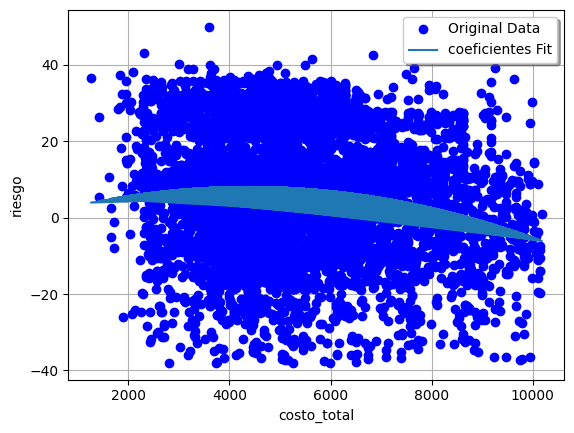

Objetivo: score_buro, Independiente: precio
Function: cuad
Parameters (a, b, c): 4.887400667881465e-06, -0.03896727710607139, 630.6660801910442
R-squared: 0.005221160959261839




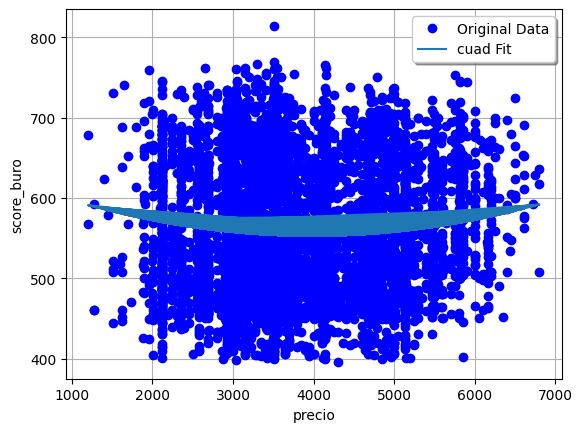

Objetivo: score_buro, Independiente: precio
Function: tangencial
Parameters (a, b, c): 0.25887041283568474, 558.0271573586168, 630.6660801910442
R-squared: 0.000280530084992181




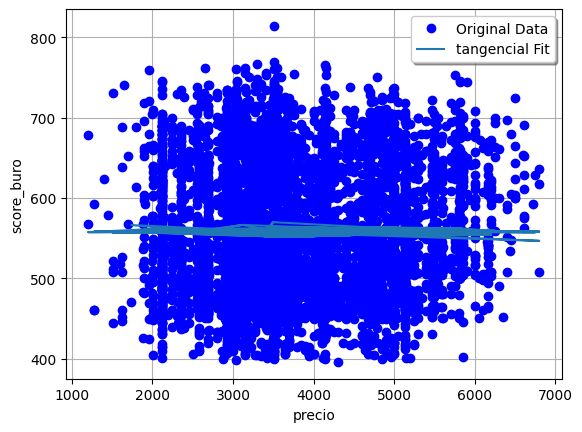

Objetivo: score_buro, Independiente: precio
Function: sinoidal
Parameters (a, b, c): 0.072487990401223, 557.9513709689236, 630.6660801910442
R-squared: 3.7774901728848675e-07




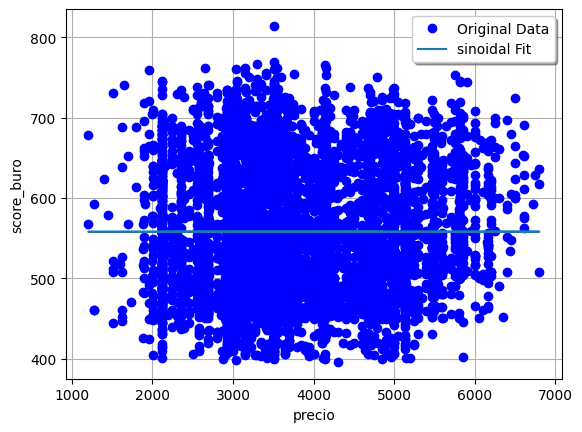

Objetivo: score_buro, Independiente: precio
Function: coeficientes
Parameters (a, b, c): -3.3419917616232754e-05, 12651.17253586582, -12650.890961771953
R-squared: -0.3479976882451046




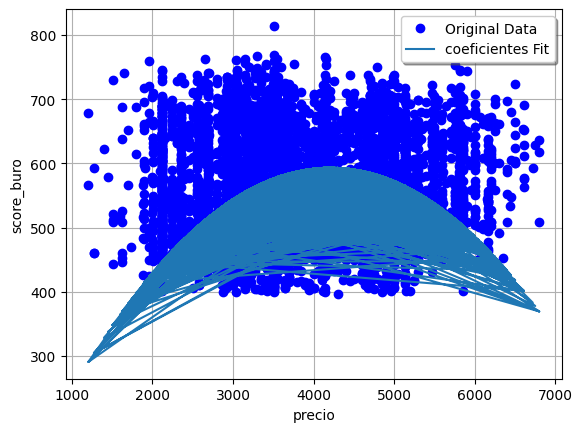

Objetivo: score_buro, Independiente: enganche
Function: cuad
Parameters (a, b, c): 8.852258025596187e-05, -0.2683941622908487, 718.4118113822135
R-squared: 0.1312970179088676




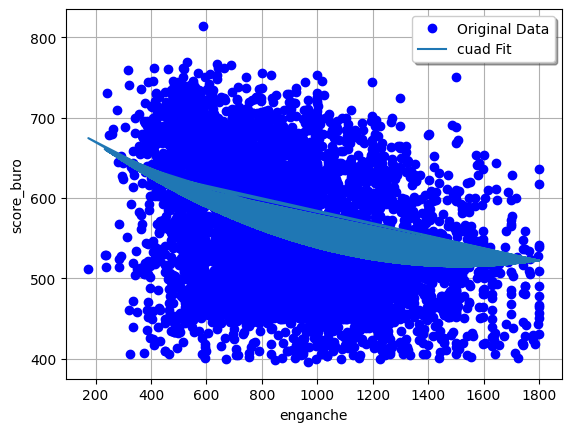

Objetivo: score_buro, Independiente: enganche
Function: tangencial
Parameters (a, b, c): -0.03596937659555269, 557.9641750668627, 718.4118113822135
R-squared: 5.2607813337712805e-05




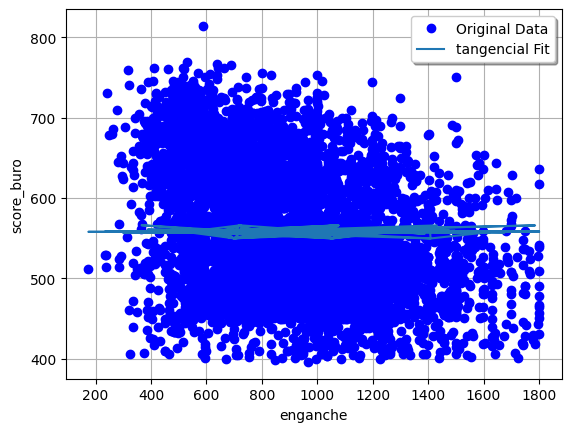

Objetivo: score_buro, Independiente: enganche
Function: sinoidal
Parameters (a, b, c): 1.0417429834877192, 557.9468615099173, 718.4118113822135
R-squared: 8.335449485374902e-05




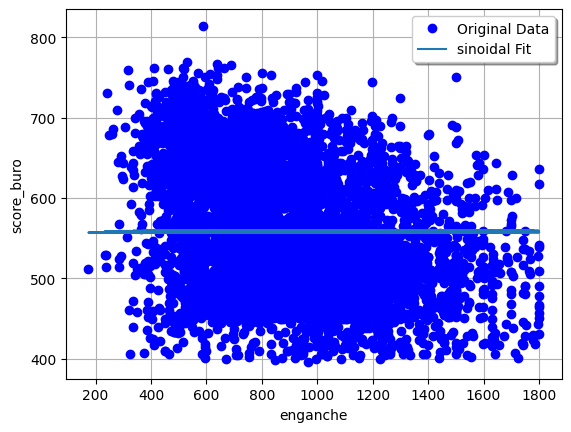

Objetivo: score_buro, Independiente: enganche
Function: coeficientes
Parameters (a, b, c): -0.0006350447637966106, 78962.75020234064, -78961.50786941384
R-squared: -0.9249810228907003




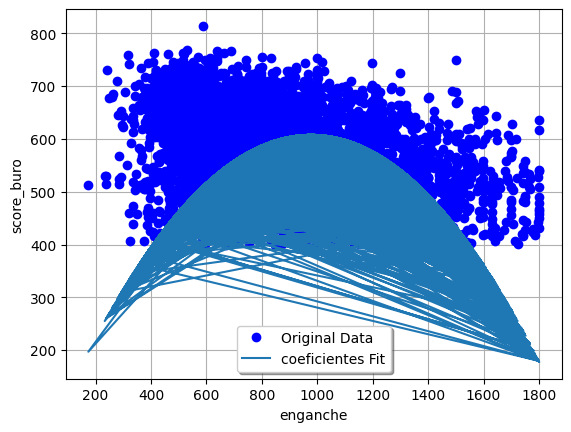

Objetivo: score_buro, Independiente: pagos_realizados
Function: cuad
Parameters (a, b, c): 0.016206582929892854, -0.644131636622145, 561.3649751037134
R-squared: 0.0008018174769555131




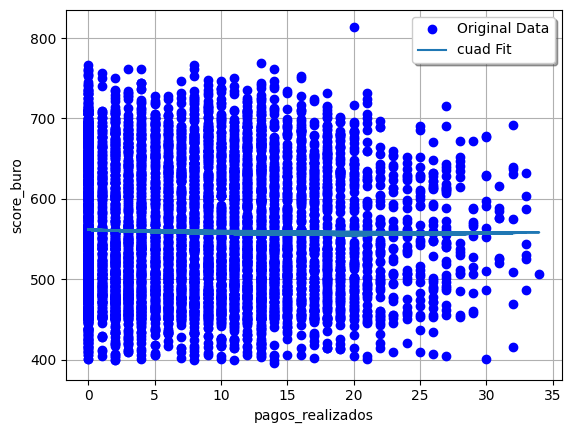

Objetivo: score_buro, Independiente: pagos_realizados
Function: tangencial
Parameters (a, b, c): 0.00025576797842219445, 557.9547763175465, 561.3649751037134
R-squared: 1.9824252683875443e-08




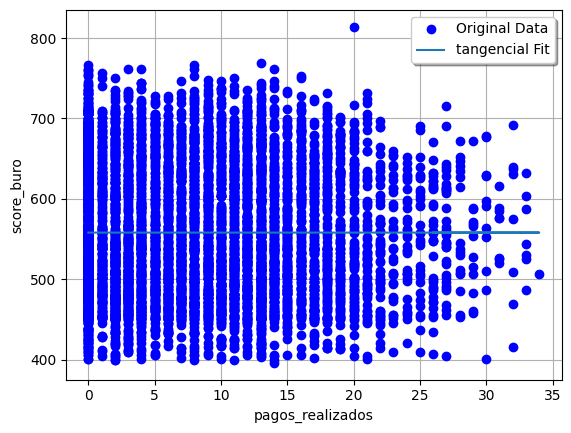

Objetivo: score_buro, Independiente: pagos_realizados
Function: sinoidal
Parameters (a, b, c): -1.8764749570439925, 558.0763340211122, 561.3649751037134
R-squared: 0.0002161931583314347




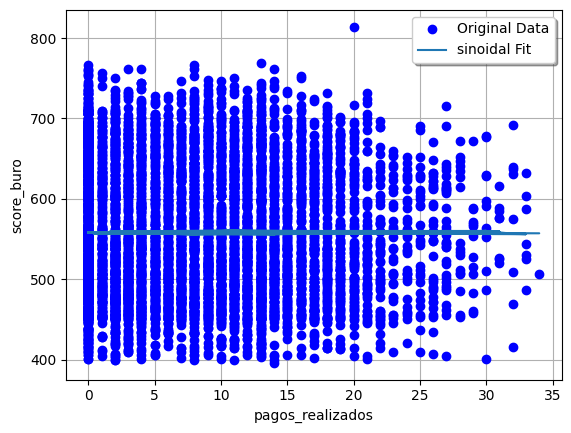

Objetivo: score_buro, Independiente: pagos_realizados
Function: coeficientes
Parameters (a, b, c): -2.7475064689474586, -1274.664959881479, 1361.2392799045197
R-squared: -14.180956502952402




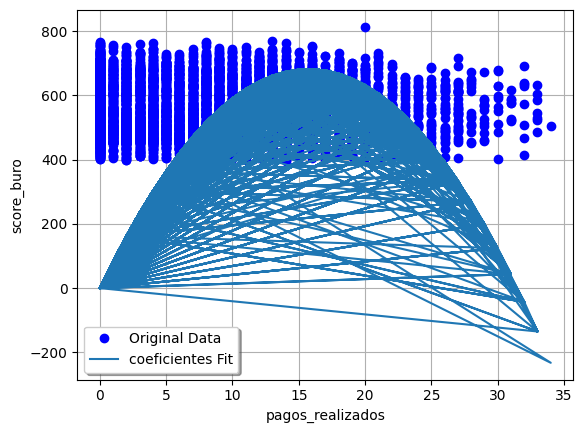

Objetivo: score_buro, Independiente: costo_total
Function: cuad
Parameters (a, b, c): 1.1297599878724132e-06, -0.007741955275943353, 563.6885762963119
R-squared: 0.01595955590046816




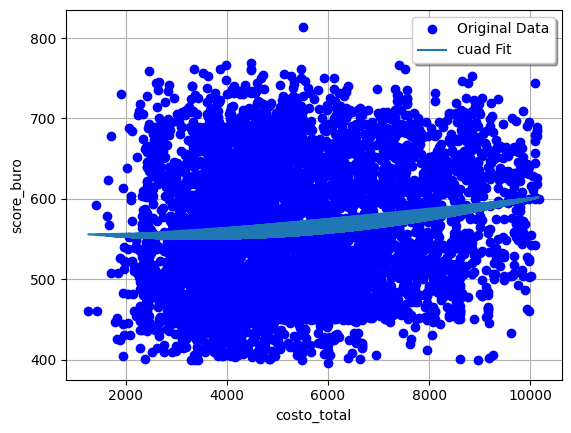

Objetivo: score_buro, Independiente: costo_total
Function: tangencial
Parameters (a, b, c): 0.10745812501109364, 557.9476385850221, 563.6885762963119
R-squared: 0.0005982409377239817




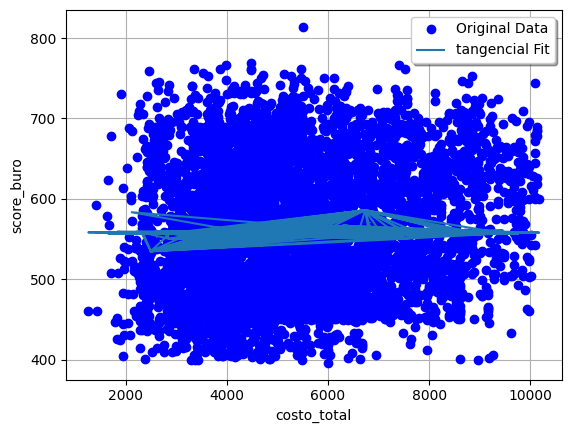

Objetivo: score_buro, Independiente: costo_total
Function: sinoidal
Parameters (a, b, c): -0.10489187084277418, 557.9545708426201, 563.6885762963119
R-squared: 8.259910820873628e-07




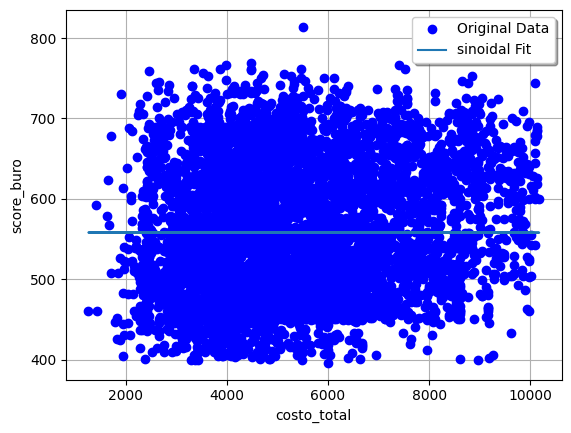

Objetivo: score_buro, Independiente: costo_total
Function: coeficientes
Parameters (a, b, c): -1.4866235284571871e-05, 473746.2519739998, -473746.0610170554
R-squared: -0.5826624766828301




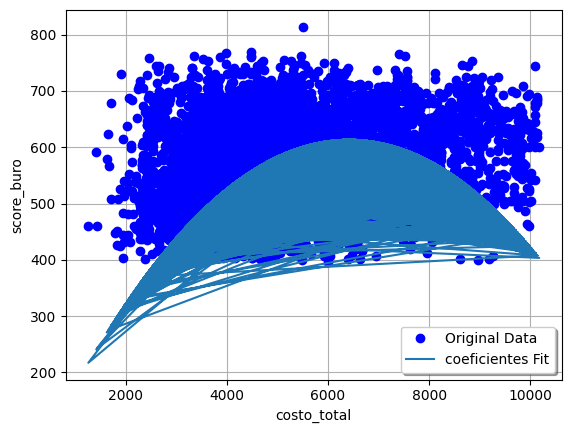

Objetivo: porc_eng, Independiente: precio
Function: cuad
Parameters (a, b, c): 1.0564244929662722e-07, -0.0007996980400317785, 24.791398646815313
R-squared: 0.0008934130765070325




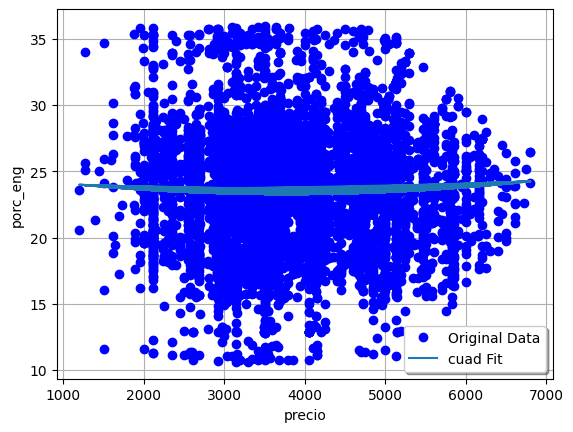

Objetivo: porc_eng, Independiente: precio
Function: tangencial
Parameters (a, b, c): -0.017351213540683967, 23.375351263196332, 24.791398646815313
R-squared: 0.00041246293455476923




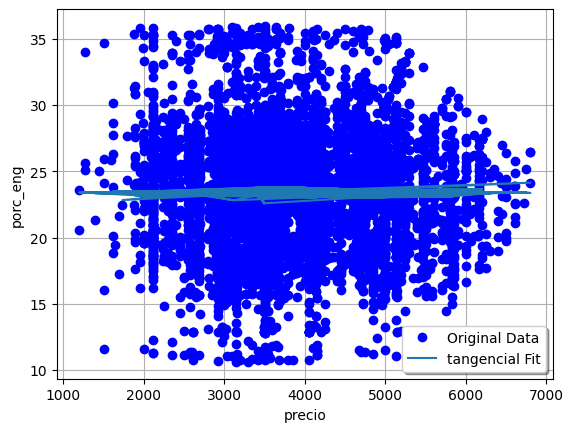

Objetivo: porc_eng, Independiente: precio
Function: sinoidal
Parameters (a, b, c): -0.06728102958714755, 23.381281170395496, 24.791398646815313
R-squared: 0.00010650255768607231




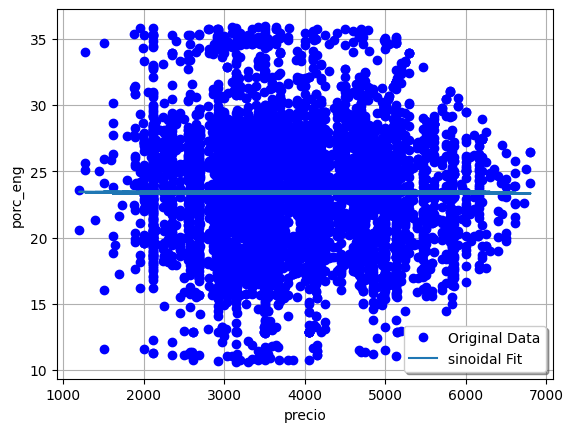

Objetivo: porc_eng, Independiente: precio
Function: coeficientes
Parameters (a, b, c): -1.4002451784819015e-06, 1033.4681337513903, -1033.4563328381576
R-squared: -0.17773715122878553




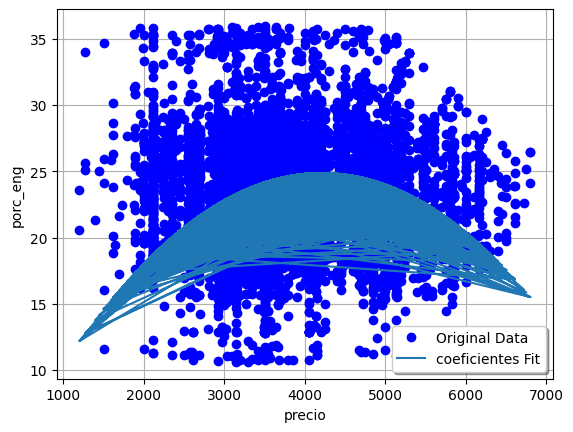

Objetivo: porc_eng, Independiente: enganche
Function: cuad
Parameters (a, b, c): -4.166283594182831e-06, 0.017145447039353872, 11.844848737296598
R-squared: 0.350739877793356




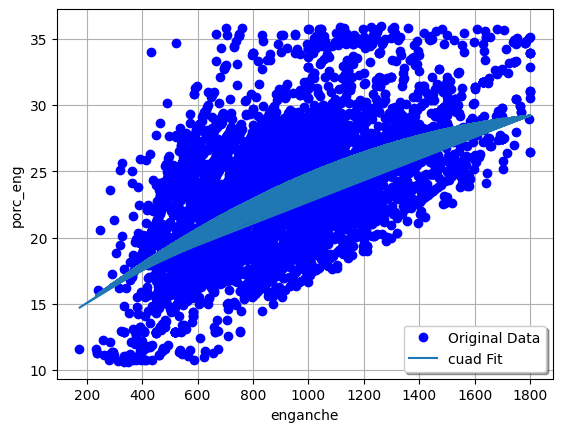

Objetivo: porc_eng, Independiente: enganche
Function: tangencial
Parameters (a, b, c): -0.0015818628687218617, 23.380884447673044, 11.844848737296598
R-squared: 3.329910591076679e-05




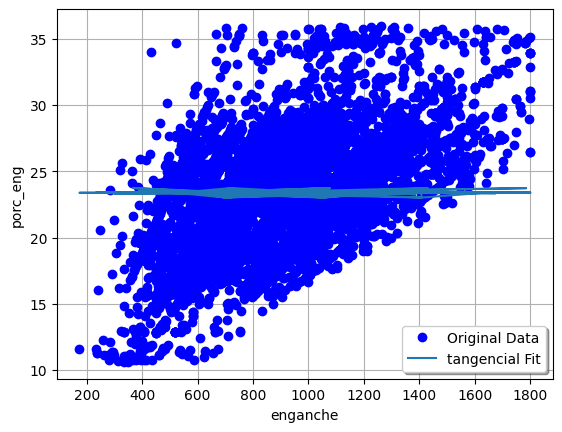

Objetivo: porc_eng, Independiente: enganche
Function: sinoidal
Parameters (a, b, c): 0.07504610361038923, 23.379968783101244, 11.844848737296598
R-squared: 0.00014157058467478834




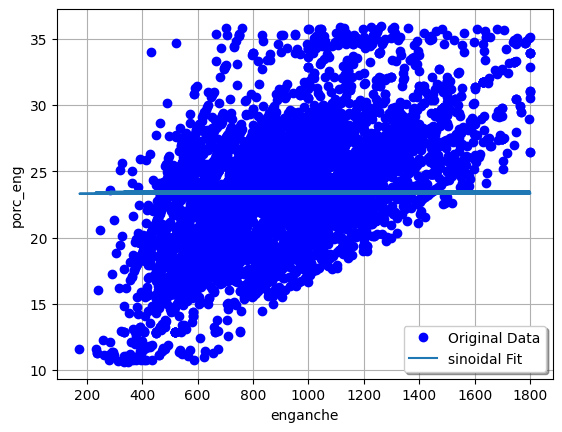

Objetivo: porc_eng, Independiente: enganche
Function: coeficientes
Parameters (a, b, c): -1.6096136814081063e-05, -78962.10800906135, 78962.15006269306
R-squared: 0.25676773225585603




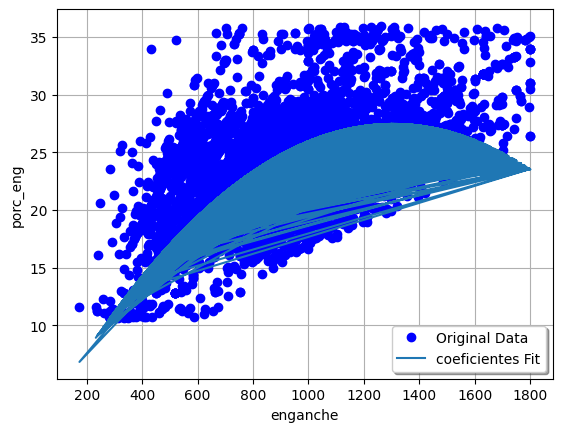

Objetivo: porc_eng, Independiente: pagos_realizados
Function: cuad
Parameters (a, b, c): -0.005839478371416146, 0.09086268653103857, 23.320716788272534
R-squared: 0.009172413694994663




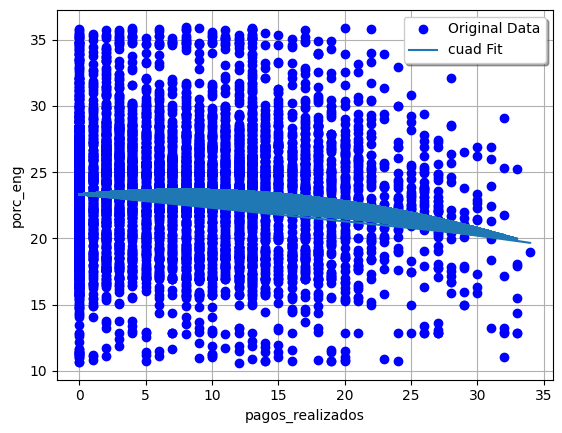

Objetivo: porc_eng, Independiente: pagos_realizados
Function: tangencial
Parameters (a, b, c): -0.0011844295189904486, 23.36917032434267, 23.320716788272534
R-squared: 0.00013913139853460876




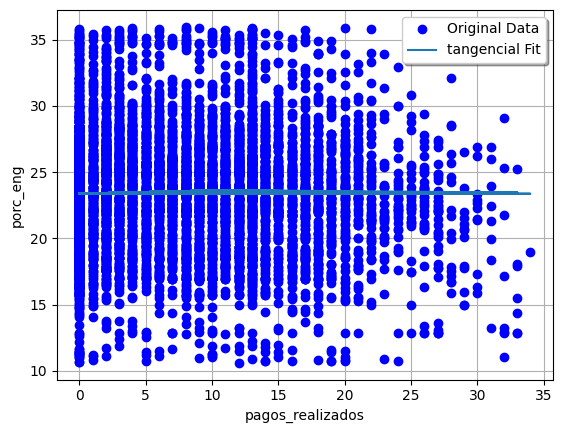

Objetivo: porc_eng, Independiente: pagos_realizados
Function: sinoidal
Parameters (a, b, c): -0.014124666133070951, 23.38129797970902, 23.320716788272534
R-squared: 4.008901676511023e-06




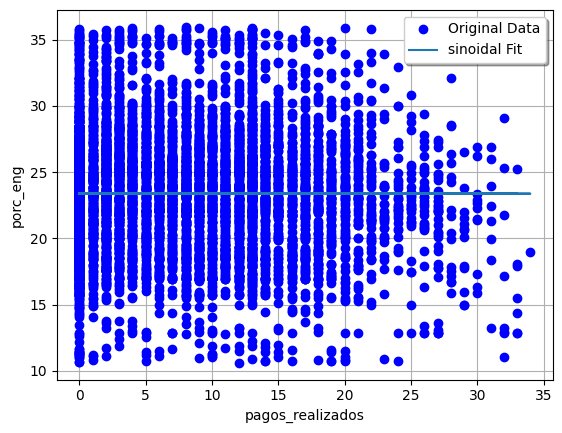

Objetivo: porc_eng, Independiente: pagos_realizados
Function: coeficientes
Parameters (a, b, c): -0.12065207303028935, -1316.0950357932475, 1319.8092039927578
R-squared: -8.000818535346305




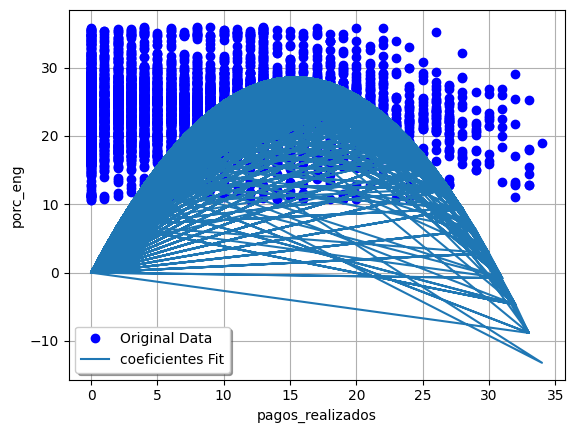

Objetivo: porc_eng, Independiente: costo_total
Function: cuad
Parameters (a, b, c): 5.9189152629966484e-08, -0.0012289090319345425, 28.075070441464966
R-squared: 0.045791087049929624




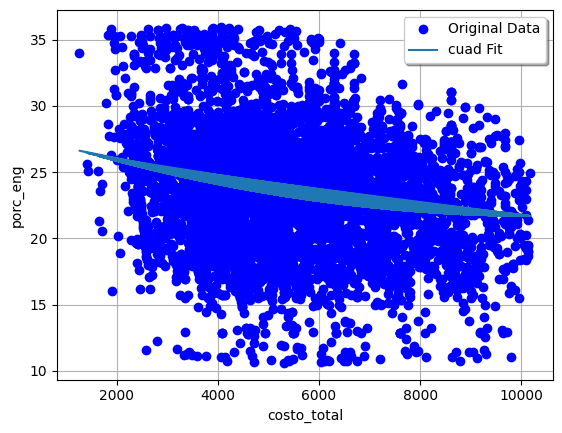

Objetivo: porc_eng, Independiente: costo_total
Function: tangencial
Parameters (a, b, c): -0.008923560207155568, 23.38075672594124, 28.075070441464966
R-squared: 0.0013501512346553168




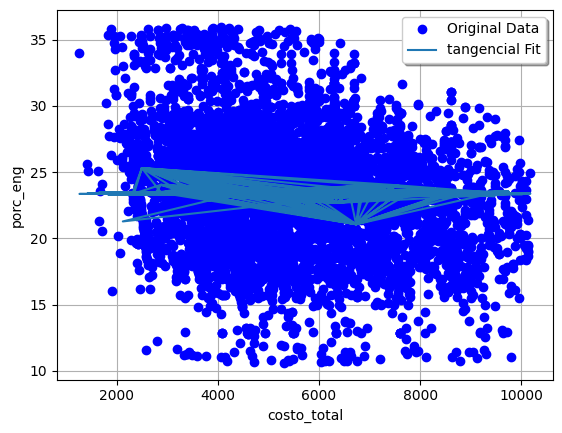

Objetivo: porc_eng, Independiente: costo_total
Function: sinoidal
Parameters (a, b, c): 0.01791097603806724, 23.379987098067406, 28.075070441464966
R-squared: 7.88193745571153e-06




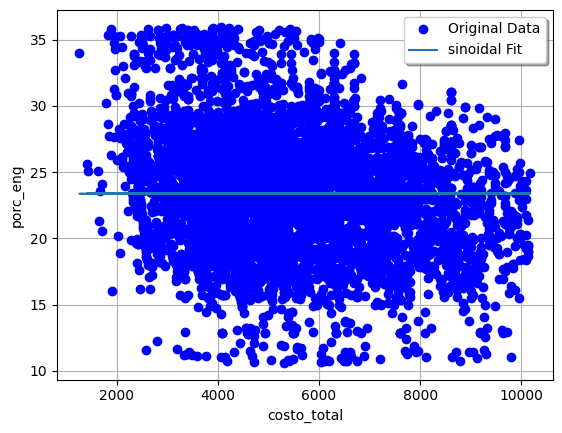

Objetivo: porc_eng, Independiente: costo_total
Function: coeficientes
Parameters (a, b, c): -7.375084352112538e-07, -473746.15216075437, 473746.16082823515
R-squared: -0.4401960033989374




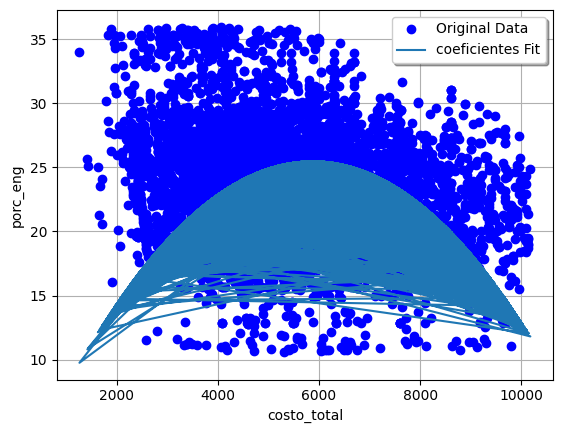

Objetivo: limite_credito, Independiente: precio
Function: cuad
Parameters (a, b, c): 6.147216901036954e-05, -0.4794265345550564, 6127.257692269902
R-squared: 0.002541003599213054




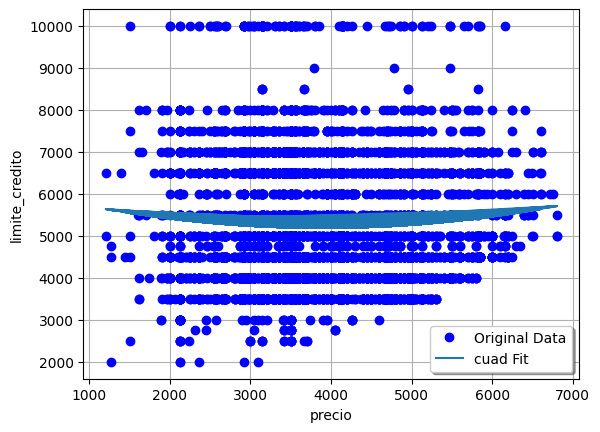

Objetivo: limite_credito, Independiente: precio
Function: tangencial
Parameters (a, b, c): 12.54947584414256, 5256.652811831316, 6127.257692269902
R-squared: 0.0019794568851342342




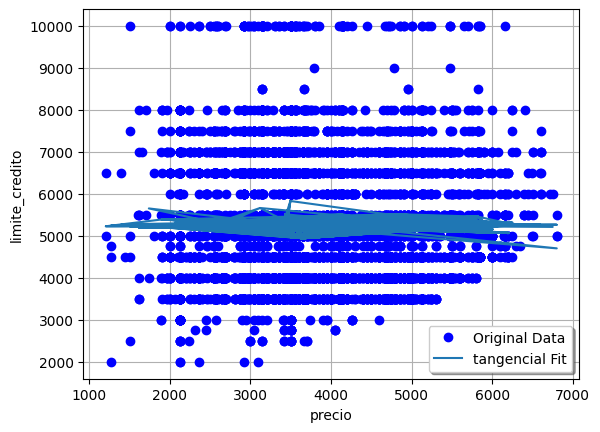

Objetivo: limite_credito, Independiente: precio
Function: sinoidal
Parameters (a, b, c): 13.246873504101544, 5252.8463012256725, 6127.257692269902
R-squared: 3.787688242673504e-05




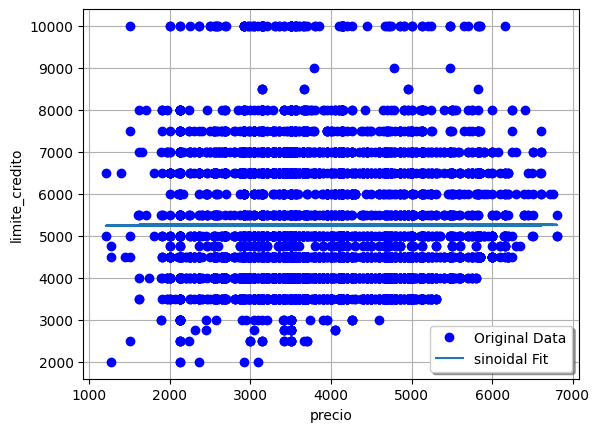

Objetivo: limite_credito, Independiente: precio
Function: coeficientes
Parameters (a, b, c): -0.0003107180833891728, 5832.962398278724, -5830.327530433831
R-squared: -0.09756410103257762




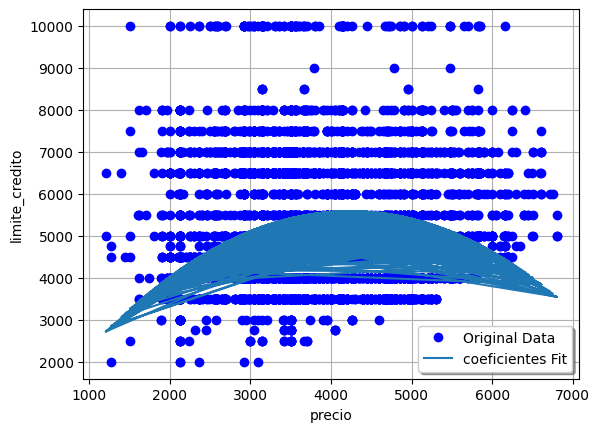

Objetivo: limite_credito, Independiente: enganche
Function: cuad
Parameters (a, b, c): 0.0032599595347665433, -8.585806369987358, 10016.437578377456
R-squared: 0.2473495710176674




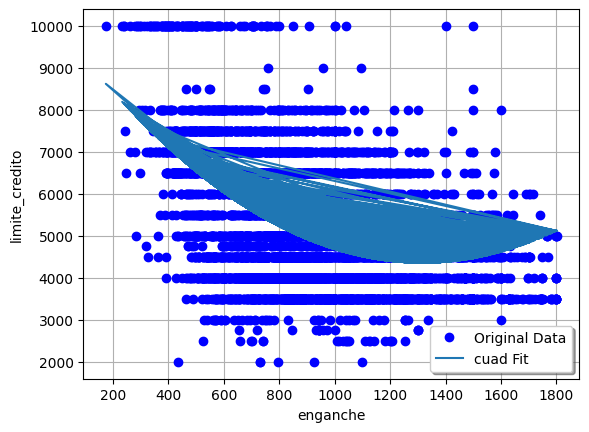

Objetivo: limite_credito, Independiente: enganche
Function: tangencial
Parameters (a, b, c): -0.9849402345507298, 5253.3502998445565, 10016.437578377456
R-squared: 0.00011843624666785235




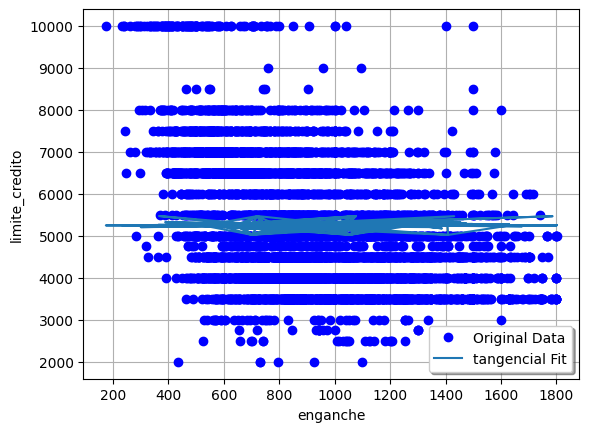

Objetivo: limite_credito, Independiente: enganche
Function: sinoidal
Parameters (a, b, c): -1.7516394230395864, 5253.035967278974, 10016.437578377456
R-squared: 7.075079886398328e-07




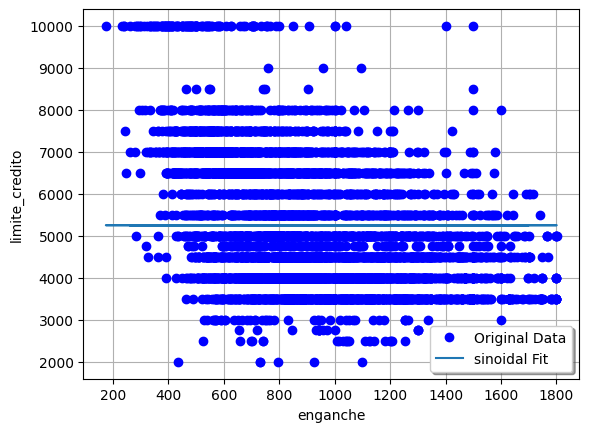

Objetivo: limite_credito, Independiente: enganche
Function: coeficientes
Parameters (a, b, c): -0.006828358881910246, 78968.36776882337, -78955.89030293103
R-squared: -0.36915591732418607




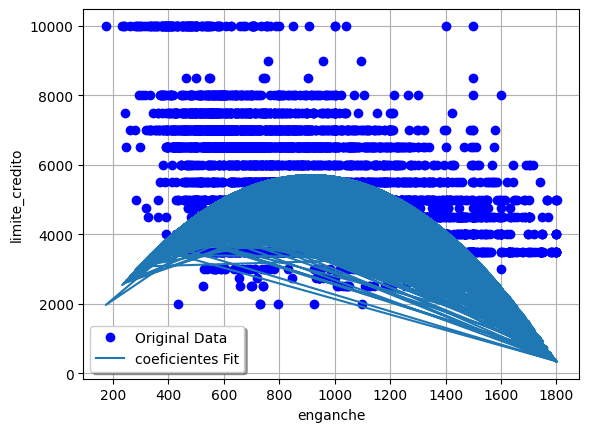

Objetivo: limite_credito, Independiente: pagos_realizados
Function: cuad
Parameters (a, b, c): 2.2006946509349965, -48.68773153727298, 5395.1704453502325
R-squared: 0.008007324785692771




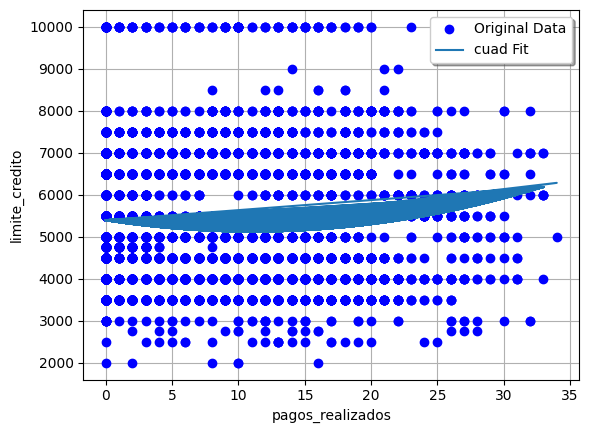

Objetivo: limite_credito, Independiente: pagos_realizados
Function: tangencial
Parameters (a, b, c): 0.9852603735756547, 5262.3387902992545, 5395.1704453502325
R-squared: 0.0008832443487004626




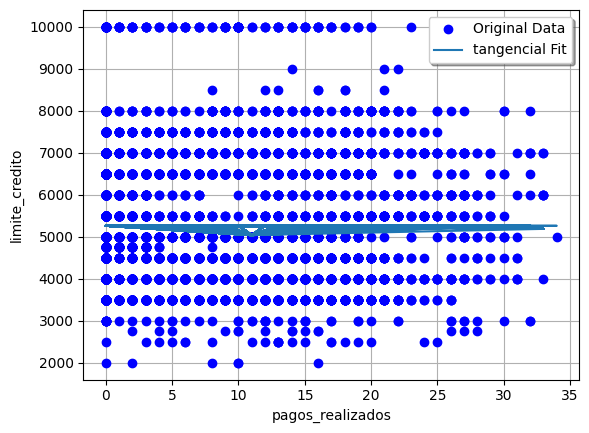

Objetivo: limite_credito, Independiente: pagos_realizados
Function: sinoidal
Parameters (a, b, c): 15.952738221180148, 5251.972764479094, 5395.1704453502325
R-squared: 4.691449631211153e-05




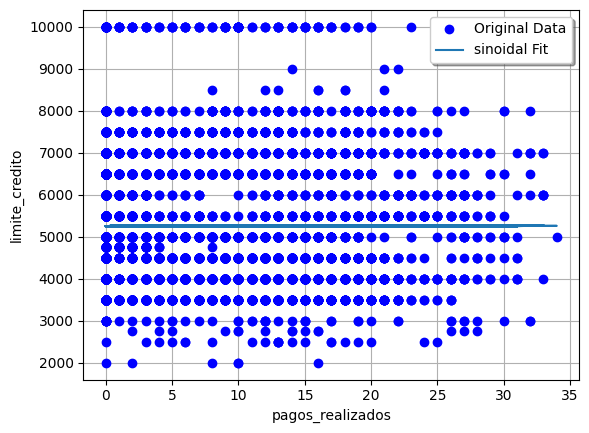

Objetivo: limite_credito, Independiente: pagos_realizados
Function: coeficientes
Parameters (a, b, c): -24.360818142836493, -923.1761318489722, 1712.7281079369734
R-squared: -3.925036939179389




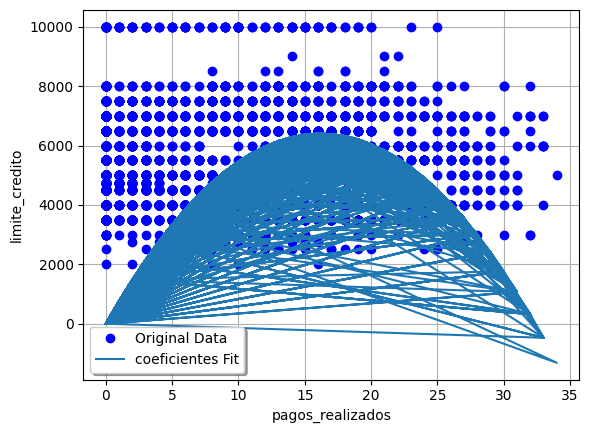

Objetivo: limite_credito, Independiente: costo_total
Function: cuad
Parameters (a, b, c): 1.6943095624714714e-05, -0.051360265870117404, 4993.4840536581
R-squared: 0.030907807701873513




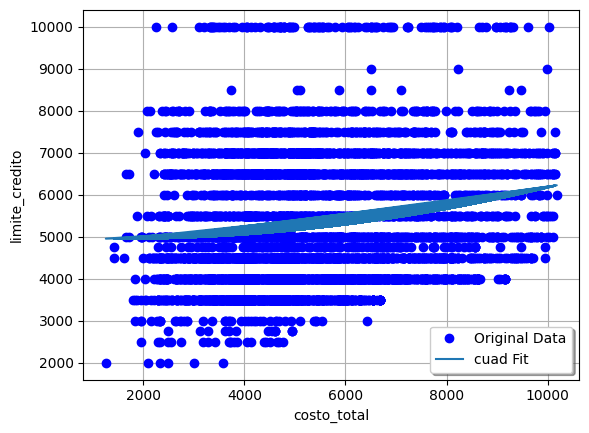

Objetivo: limite_credito, Independiente: costo_total
Function: tangencial
Parameters (a, b, c): 2.5722200694454194, 5252.913750343642, 4993.4840536581
R-squared: 0.0010291827422930222




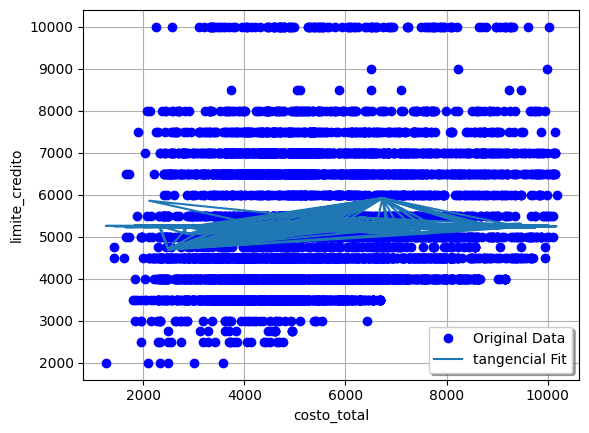

Objetivo: limite_credito, Independiente: costo_total
Function: sinoidal
Parameters (a, b, c): -26.240739535540413, 5253.580058531788, 4993.4840536581
R-squared: 0.00015520789669787316




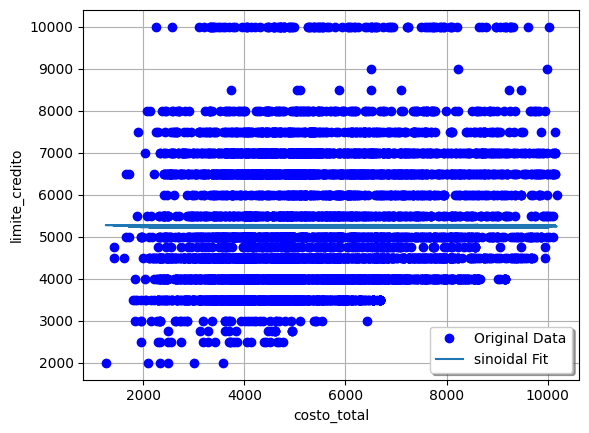

Objetivo: limite_credito, Independiente: costo_total
Function: coeficientes
Parameters (a, b, c): -0.00012475879039164361, 473747.0109110936, -473745.30207999574
R-squared: -0.11013811776851079




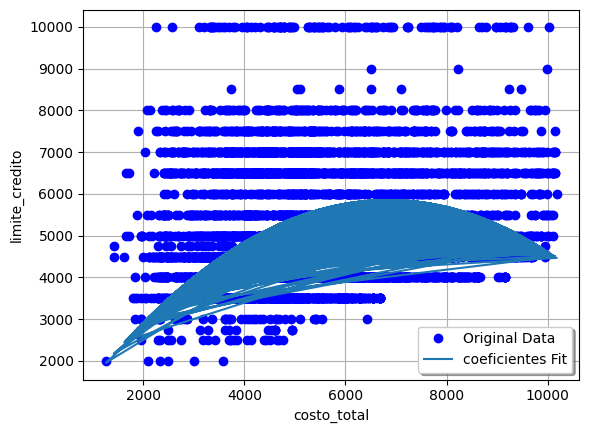

In [26]:
objetivos = ['riesgo', 'score_buro', 'porc_eng', 'limite_credito']
independientes = ['precio', 'enganche', 'pagos_realizados', 'costo_total']

#Ciclo para los modelos
for objetivo in objetivos:
    for independiente in independientes:
        x = df[independiente]
        y = df[objetivo]

        funciones = [cuad, tangencial, sinoidal, coeficientes]
        fun = ["cuad", "tangencial", "sinoidal", "coeficientes"]

        for func, func_name in zip(funciones, fun):
            #Ajuste parametros
            parametros, _ = curve_fit(func, x, y)

            #Selección parámetros según función
            if func_name == "cuad":
                a, b, c = parametros[0], parametros[1], parametros[2]
                yfit = cuad(x, a, b, c)
            elif func_name == "tangencial":
                a, b = parametros[0], parametros[1]
                yfit = tangencial(x, a, b)
            elif func_name == "sinoidal":
                a, b = parametros[0], parametros[1]
                yfit = sinoidal(x, a, b)
            elif func_name == "coeficientes":
                a, b, c = parametros[0], parametros[1], parametros[2]
                yfit = coeficientes(x, a, b, c)

            # Cálculo de coeficiente de determinación
            R2 = r2_score(y, yfit)

            #Resultados
            print(f"Objetivo: {objetivo}, Independiente: {independiente}")
            print(f"Function: {func_name}")
            print(f"Parameters (a, b, c): {a}, {b}, {c}")
            print(f"R-squared: {R2}")
            print("\n")

            #Gráfica del modelo
            plt.figure()
            plt.plot(x, y, 'bo', label="Original Data")
            plt.plot(x, yfit, label=f"{func_name} Fit")
            plt.xlabel(independiente)
            plt.ylabel(objetivo)
            plt.legend(loc='best', fancybox=True, shadow=True)
            plt.grid(True)
            plt.show()
